In [3]:
import sys 
import os 
sys.path.insert(0, '..')

In [2]:
import shutil
import os 

_outs = './test_outputs'
if os.path.exists(_outs):
    shutil.rmtree(_outs)

In [3]:
from typing import * 
import os

import numpy as np 
import pandas as pd

from biosimulator_processes.execute import exec_utc_comparison
from server.handlers.compare import generate_utc_species_comparison

Smoldyn is not properly installed in this environment and thus its process implementation cannot be registered. Please consult smoldyn documentation.
Available processes:
[ 'console-emitter',
  'ram-emitter',
  'composite',
  'cobra-process',
  'copasi-process',
  'tellurium-process',
  'utc-amici',
  'utc-copasi',
  'utc-tellurium',
  'copasi-step',
  'tellurium-step',
  'amici-step',
  'plotter',
  'plotter2d',
  'utc-comparator']


In [4]:
omex_source_dir = './examples/sbml-core'
omex_name = 'Elowitz-Nature-2000-Repressilator.omex'
omex_fp = os.path.join(omex_source_dir, omex_name)
out_dir = './test_outputs'
simulators = ['amici', 'copasi', 'tellurium']
spec_name = 'cI mRNA'

Archive contains 1 SED-ML documents with 1 models, 1 simulations, 1 tasks, 1 reports, and 1 plots:
  simulation.sedml:
    Tasks (1):
      task
    Reports (1):
      report: 7 data sets
    Plots (1):
      Figure_1c: 3 curves

Executing SED-ML file 1: simulation.sedml ...
  Found 1 tasks and 2 outputs:
    Tasks:
      `task`
    Outputs:
      `Figure_1c`
      `report`
  Executing task 1: `task`
    Executing simulation ...

/Users/alexanderpatrie/Library/Caches/pypoetry/virtualenvs/verification-api-wQEVu2Vb-py3.11/lib/python3.11/site-packages/biosimulators_utils/warnings.py:31: StandardOutputNotLoggedWarning:

Standard output and error could not be logged because capturer is not installed. To install capturer, install BioSimulators utils with the `logging` option (`pip install biosimulators-utils[logging]`).

/Users/alexanderpatrie/Library/Caches/pypoetry/virtualenvs/verification-api-wQEVu2Vb-py3.11/lib/python3.11/site-packages/biosimulators_utils/warnings.py:31: BioSimulatorsWarning:

The SED document is potentially incorrect.
  - This tool validates XPaths for model changes and variables against their unmodified target models. As a result, this tool does not fully validate these XPaths. These XPaths could be invalidated by changes to their target models.
  - Model `model` has warnings.
    - The model file `BIOMD0000000012_url.xml` has warnings.
      - 21 warnings of type SBML unit consistency (99505).

 succeeded
    Generating 2 outputs ...
      Generating output 1: `report` ... succeeded
      Generating output 2: `Figure_1c` ...

/Users/alexanderpatrie/Library/Caches/pypoetry/virtualenvs/verification-api-wQEVu2Vb-py3.11/lib/python3.11/site-packages/kisao/utils.py:518: AlgorithmSubstitutedWarning:

'CVODES' (KISAO_0000496) will be substituted for 'CVODE' (KISAO_0000019) at substitution policy 'SIMILAR_VARIABLES'.

/Users/alexanderpatrie/Library/Caches/pypoetry/virtualenvs/verification-api-wQEVu2Vb-py3.11/lib/python3.11/site-packages/biosimulators_utils/warnings.py:31: IllogicalVizWarning:

A title could not be inferred for the Y axis because the Y data generators have inconsistent names.



 succeeded

Bundling outputs ...
Cleaning up ...
Archive contains 1 SED-ML documents with 1 models, 1 simulations, 1 tasks, 1 reports, and 1 plots:
  simulation.sedml:
    Tasks (1):
      task
    Reports (1):
      report: 7 data sets
    Plots (1):
      Figure_1c: 3 curves

Executing SED-ML file 1: simulation.sedml ...
  Found 1 tasks and 2 outputs:
    Tasks:
      `task`
    Outputs:
      `Figure_1c`
      `report`
  Executing task 1: `task`
    Executing simulation ... succeeded
    Generating 2 outputs ...
      Generating output 1: `report` ... succeeded
      Generating output 2: `Figure_1c` ... succeeded

Bundling outputs ...
Cleaning up ...
Archive contains 1 SED-ML documents with 1 models, 1 simulations, 1 tasks, 1 reports, and 1 plots:
  simulation.sedml:
    Tasks (1):
      task
    Reports (1):
      report: 7 data sets
    Plots (1):
      Figure_1c: 3 curves

Executing SED-ML file 1: simulation.sedml ...
  Found 1 tasks and 2 outputs:
    Tasks:
      `task`
    Out

/Users/alexanderpatrie/Library/Caches/pypoetry/virtualenvs/verification-api-wQEVu2Vb-py3.11/lib/python3.11/site-packages/biosimulators_utils/warnings.py:31: StandardOutputNotLoggedWarning:

Standard output and error could not be logged because capturer is not installed. To install capturer, install BioSimulators utils with the `logging` option (`pip install biosimulators-utils[logging]`).

/Users/alexanderpatrie/Library/Caches/pypoetry/virtualenvs/verification-api-wQEVu2Vb-py3.11/lib/python3.11/site-packages/biosimulators_utils/warnings.py:31: BioSimulatorsWarning:

The SED document is potentially incorrect.
  - This tool validates XPaths for model changes and variables against their unmodified target models. As a result, this tool does not fully validate these XPaths. These XPaths could be invalidated by changes to their target models.
  - Model `model` has warnings.
    - The model file `BIOMD0000000012_url.xml` has warnings.
      - 21 warnings of type SBML unit consistency (99505).

 succeeded
    Generating 2 outputs ...
      Generating output 1: `report` ... succeeded
      Generating output 2: `Figure_1c` ... succeeded

Bundling outputs ...
Cleaning up ...
cI mRNA cI mRNA
cI mRNA cI mRNA
cI mRNA cI mRNA


/Users/alexanderpatrie/Library/Caches/pypoetry/virtualenvs/verification-api-wQEVu2Vb-py3.11/lib/python3.11/site-packages/biosimulators_utils/warnings.py:31: IllogicalVizWarning:

A title could not be inferred for the Y axis because the Y data generators have inconsistent names.



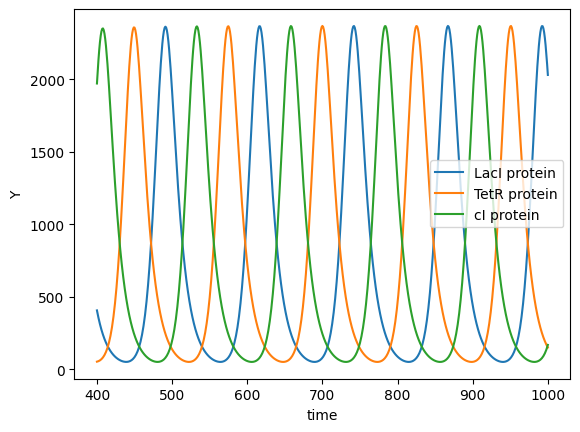

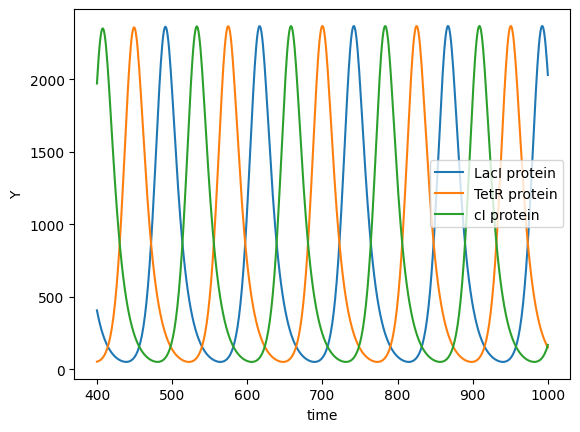

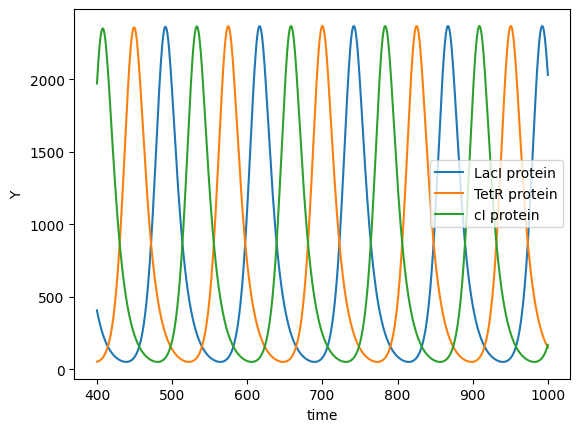

In [5]:
result = generate_utc_species_comparison(omex_fp, out_dir, spec_name, simulators)

In [6]:
os.path.exists('test_outputs/amici_outputs/reports.h5')

True

In [12]:
result

{'mse': {'amici': {'amici': 0.0,
   'copasi': 1.2781518141228932e-08,
   'tellurium': 1.3186629677278528e-07},
  'copasi': {'amici': 1.2781518141228932e-08,
   'copasi': 0.0,
   'tellurium': 2.228780103325741e-07},
  'tellurium': {'amici': 1.3186629677278528e-07,
   'copasi': 2.228780103325741e-07,
   'tellurium': 0.0}},
 'prox': {'amici': {'amici': True, 'copasi': True, 'tellurium': True},
  'copasi': {'amici': True, 'copasi': True, 'tellurium': True},
  'tellurium': {'amici': True, 'copasi': True, 'tellurium': True}},
 'output_data': {'amici': [32.52391067371288,
   32.30248562816829,
   31.77732449863027,
   30.94646165586382,
   29.81838443161927,
   28.41322138228546,
   26.76309892207361,
   24.911316463399373,
   22.910202760741164,
   20.817748038323366,
   18.693440330594754,
   16.593939955442355,
   14.569265977002463,
   12.660040317763041,
   10.896032160997287,
   9.296009895692308,
   7.86863990182966,
   6.614077642887181,
   5.525890149472534,
   4.593003319585393,
   

Archive contains 1 SED-ML documents with 1 models, 1 simulations, 1 tasks, 1 reports, and 1 plots:
  simulation.sedml:
    Tasks (1):
      task
    Reports (1):
      report: 7 data sets
    Plots (1):
      Figure_1c: 3 curves

Executing SED-ML file 1: simulation.sedml ...
  Found 1 tasks and 2 outputs:
    Tasks:
      `task`
    Outputs:
      `Figure_1c`
      `report`
  Executing task 1: `task`
    Executing simulation ...

/Users/alexanderpatrie/Library/Caches/pypoetry/virtualenvs/verification-api-wQEVu2Vb-py3.11/lib/python3.11/site-packages/biosimulators_utils/warnings.py:31: StandardOutputNotLoggedWarning:

Standard output and error could not be logged because capturer is not installed. To install capturer, install BioSimulators utils with the `logging` option (`pip install biosimulators-utils[logging]`).

/Users/alexanderpatrie/Library/Caches/pypoetry/virtualenvs/verification-api-wQEVu2Vb-py3.11/lib/python3.11/site-packages/biosimulators_utils/warnings.py:31: BioSimulatorsWarning:

The SED document is potentially incorrect.
  - This tool validates XPaths for model changes and variables against their unmodified target models. As a result, this tool does not fully validate these XPaths. These XPaths could be invalidated by changes to their target models.
  - Model `model` has warnings.
    - The model file `BIOMD0000000012_url.xml` has warnings.
      - 21 warnings of type SBML unit consistency (99505).

 succeeded
    Generating 2 outputs ...
      Generating output 1: `report` ... succeeded
      Generating output 2: `Figure_1c` ... succeeded

Bundling outputs ...
Cleaning up ...
Archive contains 1 SED-ML documents with 1 models, 1 simulations, 1 tasks, 1 reports, and 1 plots:
  simulation.sedml:
    Tasks (1):
      task
    Reports (1):
      report: 7 data sets
    Plots (1):
      Figure_1c: 3 curves

Executing SED-ML file 1: simulation.sedml ...
  Found 1 tasks and 2 outputs:
    Tasks:
      `task`
    Outputs:
      `Figure_1c`
      `report`
  Executing task 1: `task`
    Executing simulation ... succeeded
    Generating 2 outputs ...
      Generating output 1: `report` ... succeeded
      Generating output 2: `Figure_1c` ...

/Users/alexanderpatrie/Library/Caches/pypoetry/virtualenvs/verification-api-wQEVu2Vb-py3.11/lib/python3.11/site-packages/kisao/utils.py:518: AlgorithmSubstitutedWarning:

'CVODES' (KISAO_0000496) will be substituted for 'CVODE' (KISAO_0000019) at substitution policy 'SIMILAR_VARIABLES'.

/Users/alexanderpatrie/Library/Caches/pypoetry/virtualenvs/verification-api-wQEVu2Vb-py3.11/lib/python3.11/site-packages/biosimulators_utils/warnings.py:31: IllogicalVizWarning:

A title could not be inferred for the Y axis because the Y data generators have inconsistent names.

/Users/alexanderpatrie/Library/Caches/pypoetry/virtualenvs/verification-api-wQEVu2Vb-py3.11/lib/python3.11/site-packages/biosimulators_utils/warnings.py:31: StandardOutputNotLoggedWarning:

Standard output and error could not be logged because capturer is not installed. To install capturer, install BioSimulators utils with the `logging` option (`pip install biosimulators-utils[logging]`).

/Users/alexanderpatrie/Library/Caches/

 succeeded

Bundling outputs ...
Cleaning up ...
Archive contains 1 SED-ML documents with 1 models, 1 simulations, 1 tasks, 1 reports, and 1 plots:
  simulation.sedml:
    Tasks (1):
      task
    Reports (1):
      report: 7 data sets
    Plots (1):
      Figure_1c: 3 curves

Executing SED-ML file 1: simulation.sedml ...
  Found 1 tasks and 2 outputs:
    Tasks:
      `task`
    Outputs:
      `Figure_1c`
      `report`
  Executing task 1: `task`
    Executing simulation ... succeeded
    Generating 2 outputs ...
      Generating output 1: `report` ... succeeded
      Generating output 2: `Figure_1c` ...

/Users/alexanderpatrie/Library/Caches/pypoetry/virtualenvs/verification-api-wQEVu2Vb-py3.11/lib/python3.11/site-packages/biosimulators_utils/warnings.py:31: IllogicalVizWarning:

A title could not be inferred for the Y axis because the Y data generators have inconsistent names.

/Users/alexanderpatrie/Library/Caches/pypoetry/virtualenvs/verification-api-wQEVu2Vb-py3.11/lib/python3.11/site-packages/biosimulators_utils/warnings.py:31: StandardOutputNotLoggedWarning:

Standard output and error could not be logged because capturer is not installed. To install capturer, install BioSimulators utils with the `logging` option (`pip install biosimulators-utils[logging]`).

/Users/alexanderpatrie/Library/Caches/pypoetry/virtualenvs/verification-api-wQEVu2Vb-py3.11/lib/python3.11/site-packages/biosimulators_utils/warnings.py:31: BioSimulatorsWarning:

The SED document is potentially incorrect.
  - This tool validates XPaths for model changes and variables against their unmodified target models. A

 succeeded

Bundling outputs ...
Cleaning up ...


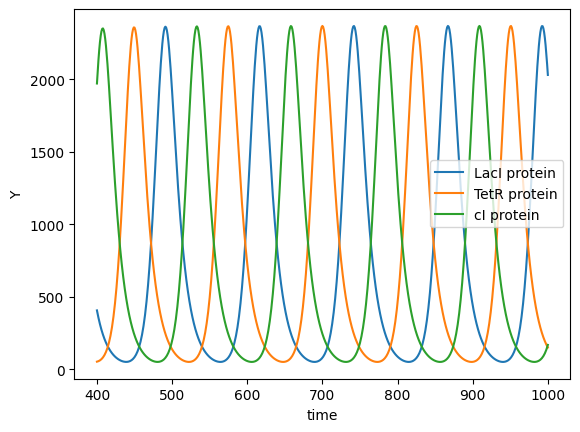

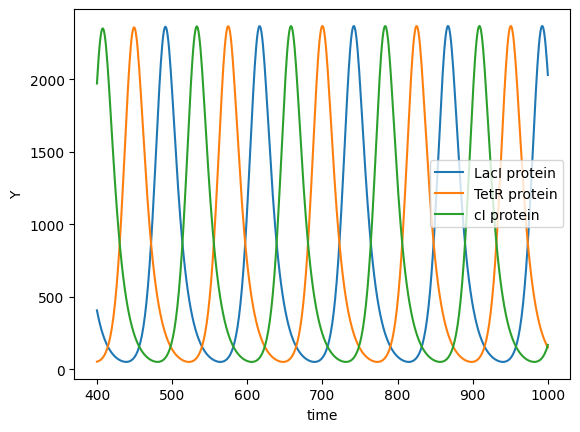

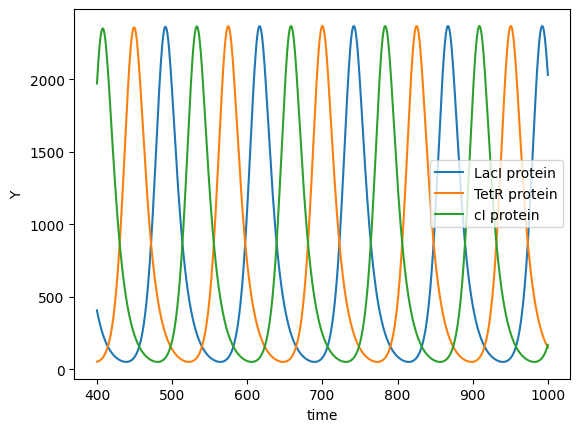

In [8]:
from server.handlers.output_data import generate_biosimulator_outputs


biosim_outputs = generate_biosimulator_outputs(omex_fp, out_dir, simulators)

In [9]:
!ls test_outputs

amici_outputs     copasi_outputs    tellurium_outputs


In [11]:
result

{'mse': {'amici': {'amici': 0.0,
   'copasi': 1.2781518141228932e-08,
   'tellurium': 1.3186629677278528e-07},
  'copasi': {'amici': 1.2781518141228932e-08,
   'copasi': 0.0,
   'tellurium': 2.228780103325741e-07},
  'tellurium': {'amici': 1.3186629677278528e-07,
   'copasi': 2.228780103325741e-07,
   'tellurium': 0.0}},
 'prox': {'amici': {'amici': True, 'copasi': True, 'tellurium': True},
  'copasi': {'amici': True, 'copasi': True, 'tellurium': True},
  'tellurium': {'amici': True, 'copasi': True, 'tellurium': True}},
 'output_data': {'amici': [32.52391067371288,
   32.30248562816829,
   31.77732449863027,
   30.94646165586382,
   29.81838443161927,
   28.41322138228546,
   26.76309892207361,
   24.911316463399373,
   22.910202760741164,
   20.817748038323366,
   18.693440330594754,
   16.593939955442355,
   14.569265977002463,
   12.660040317763041,
   10.896032160997287,
   9.296009895692308,
   7.86863990182966,
   6.614077642887181,
   5.525890149472534,
   4.593003319585393,
   

In [5]:
comparison = exec_utc_comparison(
    omex_fp=omex_fp, 
    simulators=simulators, 
    comparison_id='utc-comparison',
    include_outputs=False)

2024-06-11 10:54:28.360 - amici.sbml_import - INFO - Finished importing SBML                         (4.16E-02s)
2024-06-11 10:54:28.407 - amici.sbml_import - INFO - Finished processing SBML observables            (4.32E-02s)
2024-06-11 10:54:28.411 - amici.sbml_import - INFO - Finished processing SBML event observables      (7.92E-07s)
2024-06-11 10:54:28.433 - amici.de_model - INFO - Finished computing xdot                            (3.22E-03s)
2024-06-11 10:54:28.440 - amici.de_model - INFO - Finished computing x0                              (2.93E-03s)
2024-06-11 10:54:28.459 - amici.de_model - INFO - Finished computing w                               (1.52E-02s)
2024-06-11 10:54:29.168 - amici.de_export - INFO - Finished generating cpp code                      (7.03E-01s)
2024-06-11 10:54:37.847 - amici.de_export - INFO - Finished compiling cpp code                       (8.68E+00s)


In [6]:
comparison

{'results': {'LacI protein': {'mse': {'amici': {'amici': 0.0,
     'copasi': 3421.101751414077,
     'tellurium': 1112642.3515076651},
    'copasi': {'amici': 3421.101751414077,
     'copasi': 0.0,
     'tellurium': 1122517.493697266},
    'tellurium': {'amici': 1112642.3515076651,
     'copasi': 1122517.493697266,
     'tellurium': 0.0}},
   'prox': {'amici': {'amici': True, 'copasi': False, 'tellurium': False},
    'copasi': {'amici': False, 'copasi': True, 'tellurium': False},
    'tellurium': {'amici': False, 'copasi': False, 'tellurium': True}}},
  'TetR protein': {'mse': {'amici': {'amici': 0.0,
     'copasi': 3432.245484968864,
     'tellurium': 1182387.32612705},
    'copasi': {'amici': 3432.245484968864,
     'copasi': 0.0,
     'tellurium': 1178485.6823350259},
    'tellurium': {'amici': 1182387.32612705,
     'copasi': 1178485.6823350259,
     'tellurium': 0.0}},
   'prox': {'amici': {'amici': True, 'copasi': False, 'tellurium': False},
    'copasi': {'amici': False, 'copasi

In [7]:
comparison.keys()

dict_keys(['results', 'id'])

In [11]:
from server.data_model import UtcComparison, UtcSpeciesComparison

In [15]:
spec_comparisons

[UtcSpeciesComparison(mse={'amici': {'amici': 0.0, 'copasi': 3421.101751414077, 'tellurium': 1112642.3515076651}, 'copasi': {'amici': 3421.101751414077, 'copasi': 0.0, 'tellurium': 1122517.493697266}, 'tellurium': {'amici': 1112642.3515076651, 'copasi': 1122517.493697266, 'tellurium': 0.0}}, proximity={'amici': {'amici': True, 'copasi': False, 'tellurium': False}, 'copasi': {'amici': False, 'copasi': True, 'tellurium': False}, 'tellurium': {'amici': False, 'copasi': False, 'tellurium': True}}, output_data=None),
 UtcSpeciesComparison(mse={'amici': {'amici': 0.0, 'copasi': 3432.245484968864, 'tellurium': 1182387.32612705}, 'copasi': {'amici': 3432.245484968864, 'copasi': 0.0, 'tellurium': 1178485.6823350259}, 'tellurium': {'amici': 1182387.32612705, 'copasi': 1178485.6823350259, 'tellurium': 0.0}}, proximity={'amici': {'amici': True, 'copasi': False, 'tellurium': False}, 'copasi': {'amici': False, 'copasi': True, 'tellurium': False}, 'tellurium': {'amici': False, 'copasi': False, 'tellu

In [19]:
utc_comparison

UtcComparison(results=[UtcSpeciesComparison(mse={'amici': {'amici': 0.0, 'copasi': 3421.101751414077, 'tellurium': 1112642.3515076651}, 'copasi': {'amici': 3421.101751414077, 'copasi': 0.0, 'tellurium': 1122517.493697266}, 'tellurium': {'amici': 1112642.3515076651, 'copasi': 1122517.493697266, 'tellurium': 0.0}}, proximity={'amici': {'amici': True, 'copasi': False, 'tellurium': False}, 'copasi': {'amici': False, 'copasi': True, 'tellurium': False}, 'tellurium': {'amici': False, 'copasi': False, 'tellurium': True}}, output_data=None), UtcSpeciesComparison(mse={'amici': {'amici': 0.0, 'copasi': 3432.245484968864, 'tellurium': 1182387.32612705}, 'copasi': {'amici': 3432.245484968864, 'copasi': 0.0, 'tellurium': 1178485.6823350259}, 'tellurium': {'amici': 1182387.32612705, 'copasi': 1178485.6823350259, 'tellurium': 0.0}}, proximity={'amici': {'amici': True, 'copasi': False, 'tellurium': False}, 'copasi': {'amici': False, 'copasi': True, 'tellurium': False}, 'tellurium': {'amici': False, 'c

In [12]:
from server.handlers.io import get_sbml_species_names, unpack_omex
from tempfile import mkdtemp
import os

model = await get_sbml_species_names('/Users/alexanderpatrie/Desktop/repos/verification-service/tests/examples/sbml-core/Elowitz-Nature-2000-Repressilator/BIOMD0000000012_url.xml')


True /var/folders/yy/8crj8x7x5_3b86f0js6_0bn00000gr/T/tmp8narv9ou/BIOMD0000000012_url.xml


'BIOMD0000000012_url.xml'

In [8]:
ids = [spec for spec in model.getListOfSpecies()]

In [9]:
ids


[<Species PX "LacI protein">,
 <Species PY "TetR protein">,
 <Species PZ "cI protein">,
 <Species X "LacI mRNA">,
 <Species Y "TetR mRNA">,
 <Species Z "cI mRNA">]

In [10]:
dir(ids[0])

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__metaclass__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__swig_destroy__',
 '__weakref__',
 'addCVTerm',
 'addModifiedDate',
 'all_elements',
 'all_elements_from_plugins',
 'annotation',
 'annotation_string',
 'appendAnnotation',
 'appendNotes',
 'boundary_condition',
 'charge',
 'checkCompatibility',
 'checkMathMLNamespace',
 'clone',
 'column',
 'compartment',
 'connectToChild',
 'connectToParent',
 'constant',
 'containsUndeclaredUnits',
 'conversion_factor',
 'cv_terms',
 'deleteDisabledPlugins',
 'derived_unit_definition',
 'disablePackage',
 'divideAssignmentsToSIdByFunction',
 'element_name',
 'enablePackage',
 'enablePackageInternal',
 'getAncestorO

In [1]:
import requests 


from requests.packages.urllib3.exceptions import InsecureRequestWarning
requests.packages.urllib3.disable_warnings(InsecureRequestWarning)

url = "https://localhost:8000/biosimulators-utc-comparison"

resp = requests.post(url, verify=False)

resp

SSLError: HTTPSConnectionPool(host='localhost', port=8000): Max retries exceeded with url: /biosimulators-utc-comparison (Caused by SSLError(SSLError(1, '[SSL: WRONG_VERSION_NUMBER] wrong version number (_ssl.c:1002)')))

In [22]:
from biosimulator_processes.io import read_report_outputs


report = read_report_outputs('./examples/sbml-core/Varusai-Sci-Rep-2018-mTOR-signaling-LSODA-LSODAR-SBML/reports.h5')



Archive contains 1 SED-ML documents with 1 models, 1 simulations, 1 tasks, 1 reports, and 1 plots:
  LSODA.sedml:
    Tasks (1):
      task1
    Reports (1):
      report: 16 data sets
    Plots (1):
      Figure_2c: 1 curves

Executing SED-ML file 1: LSODA.sedml ...
  Found 1 tasks and 2 outputs:
    Tasks:
      `task1`
    Outputs:
      `Figure_2c`
      `report`
  Executing task 1: `task1`
    Executing simulation ...

/Users/alex/Library/Caches/pypoetry/virtualenvs/verification-api-zfoT2RdO-py3.11/lib/python3.11/site-packages/biosimulators_utils/warnings.py:31: StandardOutputNotLoggedWarning:

Standard output and error could not be logged because capturer is not installed. To install capturer, install BioSimulators utils with the `logging` option (`pip install biosimulators-utils[logging]`).

/Users/alex/Library/Caches/pypoetry/virtualenvs/verification-api-zfoT2RdO-py3.11/lib/python3.11/site-packages/biosimulators_utils/warnings.py:31: BioSimulatorsWarning:

The SED document is potentially incorrect.
  - This tool validates XPaths for model changes and variables against their unmodified target models. As a result, this tool does not fully validate these XPaths. These XPaths could be invalidated by changes to their target models.
  - Model `model` has warnings.
    - The model file `Varusai2018.xml` has warnings.
      - 18 warnings of type SBML unit consistency (99505). The following is the first wa

 succeeded
    Generating 2 outputs ...
      Generating output 1: `report` ... succeeded
      Generating output 2: `Figure_2c` ...

/Users/alex/Library/Caches/pypoetry/virtualenvs/verification-api-zfoT2RdO-py3.11/lib/python3.11/site-packages/kisao/utils.py:518: AlgorithmSubstitutedWarning:

'CVODE' (KISAO_0000019) will be substituted for 'LSODA/LSODAR hybrid method' (KISAO_0000560) at substitution policy 'SIMILAR_VARIABLES'.

/Users/alex/Library/Caches/pypoetry/virtualenvs/verification-api-zfoT2RdO-py3.11/lib/python3.11/site-packages/biosimulators_utils/warnings.py:31: StandardOutputNotLoggedWarning:

Standard output and error could not be logged because capturer is not installed. To install capturer, install BioSimulators utils with the `logging` option (`pip install biosimulators-utils[logging]`).



 succeeded

Bundling outputs ...
Cleaning up ...
Archive contains 1 SED-ML documents with 1 models, 1 simulations, 1 tasks, 1 reports, and 1 plots:
  LSODA.sedml:
    Tasks (1):
      task1
    Reports (1):
      report: 16 data sets
    Plots (1):
      Figure_2c: 1 curves

Executing SED-ML file 1: LSODA.sedml ...
  Found 1 tasks and 2 outputs:
    Tasks:
      `task1`
    Outputs:
      `Figure_2c`
      `report`
  Executing task 1: `task1`
    Executing simulation ... succeeded
    Generating 2 outputs ...
      Generating output 1: `report` ... succeeded
      Generating output 2: `Figure_2c` ...

/Users/alex/Library/Caches/pypoetry/virtualenvs/verification-api-zfoT2RdO-py3.11/lib/python3.11/site-packages/biosimulators_utils/warnings.py:31: BioSimulatorsWarning:

The SED document is potentially incorrect.
  - This tool validates XPaths for model changes and variables against their unmodified target models. As a result, this tool does not fully validate these XPaths. These XPaths could be invalidated by changes to their target models.
  - Model `model` has warnings.
    - The model file `Varusai2018.xml` has warnings.
      - 18 warnings of type SBML unit consistency (99505). The following is the first warning at line 974, column 8:
        - In situations where a mathematical expression contains literal numbers or parameters whose units have not been declared, it is not possible to verify accurately the consistency of the units in the expression. 
           The units of the <kineticLaw> <math> expression 'compartment * Henri_Michaelis_Menten__irreversible(IR, Km1, V1)' cannot b

 succeeded

Bundling outputs ...
Cleaning up ...
IR IR
IR IR
Archive contains 1 SED-ML documents with 1 models, 1 simulations, 1 tasks, 1 reports, and 1 plots:
  LSODA.sedml:
    Tasks (1):
      task1
    Reports (1):
      report: 16 data sets
    Plots (1):
      Figure_2c: 1 curves

Executing SED-ML file 1: LSODA.sedml ...
  Found 1 tasks and 2 outputs:
    Tasks:
      `task1`
    Outputs:
      `Figure_2c`
      `report`
  Executing task 1: `task1`
    Executing simulation ... succeeded
    Generating 2 outputs ...
      Generating output 1: `report` ... succeeded
      Generating output 2: `Figure_2c` ...

/Users/alex/Library/Caches/pypoetry/virtualenvs/verification-api-zfoT2RdO-py3.11/lib/python3.11/site-packages/biosimulators_utils/warnings.py:31: StandardOutputNotLoggedWarning:

Standard output and error could not be logged because capturer is not installed. To install capturer, install BioSimulators utils with the `logging` option (`pip install biosimulators-utils[logging]`).

/Users/alex/Library/Caches/pypoetry/virtualenvs/verification-api-zfoT2RdO-py3.11/lib/python3.11/site-packages/biosimulators_utils/warnings.py:31: BioSimulatorsWarning:

The SED document is potentially incorrect.
  - This tool validates XPaths for model changes and variables against their unmodified target models. As a result, this tool does not fully validate these XPaths. These XPaths could be invalidated by changes to their target models.
  - Model `model` has warnings.
    - The model file `Varusai2018.xml` has warnings.
      - 18 warnings of type SBML unit consistency (99505). The following is the first wa

 succeeded

Bundling outputs ...
Cleaning up ...
Archive contains 1 SED-ML documents with 1 models, 1 simulations, 1 tasks, 1 reports, and 1 plots:
  LSODA.sedml:
    Tasks (1):
      task1
    Reports (1):
      report: 16 data sets
    Plots (1):
      Figure_2c: 1 curves

Executing SED-ML file 1: LSODA.sedml ...
  Found 1 tasks and 2 outputs:
    Tasks:
      `task1`
    Outputs:
      `Figure_2c`
      `report`
  Executing task 1: `task1`
    Executing simulation ... succeeded
    Generating 2 outputs ...
      Generating output 1: `report` ... succeeded
      Generating output 2: `Figure_2c` ... succeeded

Bundling outputs ...
Cleaning up ...
pIR pIR
pIR pIR


/Users/alex/Library/Caches/pypoetry/virtualenvs/verification-api-zfoT2RdO-py3.11/lib/python3.11/site-packages/biosimulators_utils/warnings.py:31: StandardOutputNotLoggedWarning:

Standard output and error could not be logged because capturer is not installed. To install capturer, install BioSimulators utils with the `logging` option (`pip install biosimulators-utils[logging]`).

/Users/alex/Library/Caches/pypoetry/virtualenvs/verification-api-zfoT2RdO-py3.11/lib/python3.11/site-packages/biosimulators_utils/warnings.py:31: BioSimulatorsWarning:

The SED document is potentially incorrect.
  - This tool validates XPaths for model changes and variables against their unmodified target models. As a result, this tool does not fully validate these XPaths. These XPaths could be invalidated by changes to their target models.
  - Model `model` has warnings.
    - The model file `Varusai2018.xml` has warnings.
      - 18 warnings of type SBML unit consistency (99505). The following is the first wa

Archive contains 1 SED-ML documents with 1 models, 1 simulations, 1 tasks, 1 reports, and 1 plots:
  LSODA.sedml:
    Tasks (1):
      task1
    Reports (1):
      report: 16 data sets
    Plots (1):
      Figure_2c: 1 curves

Executing SED-ML file 1: LSODA.sedml ...
  Found 1 tasks and 2 outputs:
    Tasks:
      `task1`
    Outputs:
      `Figure_2c`
      `report`
  Executing task 1: `task1`
    Executing simulation ... succeeded
    Generating 2 outputs ...
      Generating output 1: `report` ... succeeded
      Generating output 2: `Figure_2c` ... succeeded


/Users/alex/Library/Caches/pypoetry/virtualenvs/verification-api-zfoT2RdO-py3.11/lib/python3.11/site-packages/biosimulators_utils/warnings.py:31: BioSimulatorsWarning:

The SED document is potentially incorrect.
  - This tool validates XPaths for model changes and variables against their unmodified target models. As a result, this tool does not fully validate these XPaths. These XPaths could be invalidated by changes to their target models.
  - Model `model` has warnings.
    - The model file `Varusai2018.xml` has warnings.
      - 18 warnings of type SBML unit consistency (99505). The following is the first warning at line 974, column 8:
        - In situations where a mathematical expression contains literal numbers or parameters whose units have not been declared, it is not possible to verify accurately the consistency of the units in the expression. 
           The units of the <kineticLaw> <math> expression 'compartment * Henri_Michaelis_Menten__irreversible(IR, Km1, V1)' cannot b


Bundling outputs ...
Cleaning up ...
Archive contains 1 SED-ML documents with 1 models, 1 simulations, 1 tasks, 1 reports, and 1 plots:
  LSODA.sedml:
    Tasks (1):
      task1
    Reports (1):
      report: 16 data sets
    Plots (1):
      Figure_2c: 1 curves

Executing SED-ML file 1: LSODA.sedml ...
  Found 1 tasks and 2 outputs:
    Tasks:
      `task1`
    Outputs:
      `Figure_2c`
      `report`
  Executing task 1: `task1`
    Executing simulation ... succeeded
    Generating 2 outputs ...
      Generating output 1: `report` ... succeeded
      Generating output 2: `Figure_2c` ... succeeded

Bundling outputs ...
Cleaning up ...


/Users/alex/Library/Caches/pypoetry/virtualenvs/verification-api-zfoT2RdO-py3.11/lib/python3.11/site-packages/biosimulators_utils/warnings.py:31: BioSimulatorsWarning:

The SED document is potentially incorrect.
  - This tool validates XPaths for model changes and variables against their unmodified target models. As a result, this tool does not fully validate these XPaths. These XPaths could be invalidated by changes to their target models.

/Users/alex/Library/Caches/pypoetry/virtualenvs/verification-api-zfoT2RdO-py3.11/lib/python3.11/site-packages/biosimulators_utils/warnings.py:31: BioSimulatorsWarning:

- Variable `var_mTORC2` has warnings.
  - XPath could not be validated.
- Variable `var_mTORC2_DEPTOR` has warnings.
  - XPath could not be validated.
- Variable `var_pmTORC2` has warnings.
  - XPath could not be validated.
- Variable `var_Akt` has warnings.
  - XPath could not be validated.
- Variable `var_DEPTOR` has warnings.
  - XPath could not be validated.
- Variable `var_pIR`

IRS IRS
IRS IRS
Archive contains 1 SED-ML documents with 1 models, 1 simulations, 1 tasks, 1 reports, and 1 plots:
  LSODA.sedml:
    Tasks (1):
      task1
    Reports (1):
      report: 16 data sets
    Plots (1):
      Figure_2c: 1 curves

Executing SED-ML file 1: LSODA.sedml ...
  Found 1 tasks and 2 outputs:
    Tasks:
      `task1`
    Outputs:
      `Figure_2c`
      `report`
  Executing task 1: `task1`
    Executing simulation ... succeeded
    Generating 2 outputs ...
      Generating output 1: `report` ... succeeded
      Generating output 2: `Figure_2c` ... succeeded

Bundling outputs ...
Cleaning up ...
Archive contains 1 SED-ML documents with 1 models, 1 simulations, 1 tasks, 1 reports, and 1 plots:
  LSODA.sedml:
    Tasks (1):
      task1
    Reports (1):
      report: 16 data sets
    Plots (1):
      Figure_2c: 1 curves

Executing SED-ML file 1: LSODA.sedml ...
  Found 1 tasks and 2 outputs:
    Tasks:
      `task1`
    Outputs:
      `Figure_2c`
      `report`
  Execu

/Users/alex/Library/Caches/pypoetry/virtualenvs/verification-api-zfoT2RdO-py3.11/lib/python3.11/site-packages/biosimulators_utils/warnings.py:31: BioSimulatorsWarning:

- Variable `var_pmTORC1` has warnings.
  - XPath could not be validated.
- Variable `var_pmTORC2` has warnings.
  - XPath could not be validated.
- Variable `var_IR` has warnings.
  - XPath could not be validated.
- Variable `var_mTORC1` has warnings.
  - XPath could not be validated.
- Variable `var_mTORC1_DEPTOR` has warnings.
  - XPath could not be validated.
- Variable `var_pDEPTOR` has warnings.
  - XPath could not be validated.
- Variable `var_Akt` has warnings.
  - XPath could not be validated.
- Variable `var_IRS` has warnings.
  - XPath could not be validated.
- Variable `var_mTORC2` has warnings.
  - XPath could not be validated.
- Variable `var_DEPTOR` has warnings.
  - XPath could not be validated.
- Variable `var_pAkt` has warnings.
  - XPath could not be validated.
- Variable `var_pIRS` has warnings.
  - X

 succeeded
    Generating 2 outputs ...
      Generating output 1: `report` ... succeeded
      Generating output 2: `Figure_2c` ... succeeded

Bundling outputs ...
Cleaning up ...
pIRS pIRS
pIRS pIRS
Archive contains 1 SED-ML documents with 1 models, 1 simulations, 1 tasks, 1 reports, and 1 plots:
  LSODA.sedml:
    Tasks (1):
      task1
    Reports (1):
      report: 16 data sets
    Plots (1):
      Figure_2c: 1 curves

Executing SED-ML file 1: LSODA.sedml ...
  Found 1 tasks and 2 outputs:
    Tasks:
      `task1`
    Outputs:
      `Figure_2c`
      `report`
  Executing task 1: `task1`
    Executing simulation ...

/Users/alex/Library/Caches/pypoetry/virtualenvs/verification-api-zfoT2RdO-py3.11/lib/python3.11/site-packages/biosimulators_utils/warnings.py:31: BioSimulatorsWarning:

- Variable `var_iIRS` has warnings.
  - XPath could not be validated.
- Variable `var_mTORC2_DEPTOR` has warnings.
  - XPath could not be validated.
- Variable `var_mTORC1_DEPTOR` has warnings.
  - XPath could not be validated.
- Variable `var_pIR` has warnings.
  - XPath could not be validated.
- Variable `var_IRS` has warnings.
  - XPath could not be validated.
- Variable `var_pmTORC1` has warnings.
  - XPath could not be validated.
- Variable `var_mTORC1` has warnings.
  - XPath could not be validated.
- Variable `var_IR` has warnings.
  - XPath could not be validated.
- Variable `var_pIRS` has warnings.
  - XPath could not be validated.
- Variable `var_mTORC2` has warnings.
  - XPath could not be validated.
- Variable `var_pmTORC2` has warnings.
  - XPath could not be validated.
- Variable `var_pDEPTOR` has warnings

 succeeded
    Generating 2 outputs ...
      Generating output 1: `report` ... succeeded
      Generating output 2: `Figure_2c` ... succeeded

Bundling outputs ...
Cleaning up ...
Archive contains 1 SED-ML documents with 1 models, 1 simulations, 1 tasks, 1 reports, and 1 plots:
  LSODA.sedml:
    Tasks (1):
      task1
    Reports (1):
      report: 16 data sets
    Plots (1):
      Figure_2c: 1 curves

Executing SED-ML file 1: LSODA.sedml ...
  Found 1 tasks and 2 outputs:
    Tasks:
      `task1`
    Outputs:
      `Figure_2c`
      `report`
  Executing task 1: `task1`
    Executing simulation ... succeeded
    Generating 2 outputs ...
      Generating output 1: `report` ...

/Users/alex/Library/Caches/pypoetry/virtualenvs/verification-api-zfoT2RdO-py3.11/lib/python3.11/site-packages/kisao/utils.py:518: AlgorithmSubstitutedWarning:

'CVODE' (KISAO_0000019) will be substituted for 'LSODA/LSODAR hybrid method' (KISAO_0000560) at substitution policy 'SIMILAR_VARIABLES'.

/Users/alex/Library/Caches/pypoetry/virtualenvs/verification-api-zfoT2RdO-py3.11/lib/python3.11/site-packages/biosimulators_utils/warnings.py:31: StandardOutputNotLoggedWarning:

Standard output and error could not be logged because capturer is not installed. To install capturer, install BioSimulators utils with the `logging` option (`pip install biosimulators-utils[logging]`).

/Users/alex/Library/Caches/pypoetry/virtualenvs/verification-api-zfoT2RdO-py3.11/lib/python3.11/site-packages/biosimulators_utils/warnings.py:31: BioSimulatorsWarning:

The SED document is potentially incorrect.
  - This tool validates XPaths for model changes and variables against their unmodified target models. As a 

 succeeded
      Generating output 2: `Figure_2c` ... succeeded

Bundling outputs ...
Cleaning up ...
iIRS iIRS
iIRS iIRS
Archive contains 1 SED-ML documents with 1 models, 1 simulations, 1 tasks, 1 reports, and 1 plots:
  LSODA.sedml:
    Tasks (1):
      task1
    Reports (1):
      report: 16 data sets
    Plots (1):
      Figure_2c: 1 curves

Executing SED-ML file 1: LSODA.sedml ...
  Found 1 tasks and 2 outputs:
    Tasks:
      `task1`
    Outputs:
      `Figure_2c`
      `report`
  Executing task 1: `task1`
    Executing simulation ... succeeded
    Generating 2 outputs ...
      Generating output 1: `report` ... succeeded
      Generating output 2: `Figure_2c` ... succeeded

Bundling outputs ...


/Users/alex/Library/Caches/pypoetry/virtualenvs/verification-api-zfoT2RdO-py3.11/lib/python3.11/site-packages/biosimulators_utils/warnings.py:31: StandardOutputNotLoggedWarning:

Standard output and error could not be logged because capturer is not installed. To install capturer, install BioSimulators utils with the `logging` option (`pip install biosimulators-utils[logging]`).

/Users/alex/Library/Caches/pypoetry/virtualenvs/verification-api-zfoT2RdO-py3.11/lib/python3.11/site-packages/biosimulators_utils/warnings.py:31: BioSimulatorsWarning:

The SED document is potentially incorrect.
  - This tool validates XPaths for model changes and variables against their unmodified target models. As a result, this tool does not fully validate these XPaths. These XPaths could be invalidated by changes to their target models.
  - Model `model` has warnings.
    - The model file `Varusai2018.xml` has warnings.
      - 18 warnings of type SBML unit consistency (99505). The following is the first wa

Cleaning up ...
Archive contains 1 SED-ML documents with 1 models, 1 simulations, 1 tasks, 1 reports, and 1 plots:
  LSODA.sedml:
    Tasks (1):
      task1
    Reports (1):
      report: 16 data sets
    Plots (1):
      Figure_2c: 1 curves

Executing SED-ML file 1: LSODA.sedml ...
  Found 1 tasks and 2 outputs:
    Tasks:
      `task1`
    Outputs:
      `Figure_2c`
      `report`
  Executing task 1: `task1`
    Executing simulation ... succeeded
    Generating 2 outputs ...
      Generating output 1: `report` ... succeeded
      Generating output 2: `Figure_2c` ... succeeded

Bundling outputs ...
Cleaning up ...
Akt Akt
Akt Akt


/Users/alex/Library/Caches/pypoetry/virtualenvs/verification-api-zfoT2RdO-py3.11/lib/python3.11/site-packages/biosimulators_utils/warnings.py:31: BioSimulatorsWarning:

The SED document is potentially incorrect.
  - This tool validates XPaths for model changes and variables against their unmodified target models. As a result, this tool does not fully validate these XPaths. These XPaths could be invalidated by changes to their target models.
  - Model `model` has warnings.
    - The model file `Varusai2018.xml` has warnings.
      - 18 warnings of type SBML unit consistency (99505). The following is the first warning at line 974, column 8:
        - In situations where a mathematical expression contains literal numbers or parameters whose units have not been declared, it is not possible to verify accurately the consistency of the units in the expression. 
           The units of the <kineticLaw> <math> expression 'compartment * Henri_Michaelis_Menten__irreversible(IR, Km1, V1)' cannot b

Archive contains 1 SED-ML documents with 1 models, 1 simulations, 1 tasks, 1 reports, and 1 plots:
  LSODA.sedml:
    Tasks (1):
      task1
    Reports (1):
      report: 16 data sets
    Plots (1):
      Figure_2c: 1 curves

Executing SED-ML file 1: LSODA.sedml ...
  Found 1 tasks and 2 outputs:
    Tasks:
      `task1`
    Outputs:
      `Figure_2c`
      `report`
  Executing task 1: `task1`
    Executing simulation ... succeeded
    Generating 2 outputs ...
      Generating output 1: `report` ... succeeded
      Generating output 2: `Figure_2c` ... succeeded

Bundling outputs ...
Cleaning up ...
Archive contains 1 SED-ML documents with 1 models, 1 simulations, 1 tasks, 1 reports, and 1 plots:
  LSODA.sedml:
    Tasks (1):
      task1
    Reports (1):
      report: 16 data sets
    Plots (1):
      Figure_2c: 1 curves

Executing SED-ML file 1: LSODA.sedml ...
  Found 1 tasks and 2 outputs:
    Tasks:
      `task1`
    Outputs:
      `Figure_2c`
      `report`
  Executing task 1: `ta

/Users/alex/Library/Caches/pypoetry/virtualenvs/verification-api-zfoT2RdO-py3.11/lib/python3.11/site-packages/biosimulators_utils/warnings.py:31: BioSimulatorsWarning:

- Variable `var_mTORC2_DEPTOR` has warnings.
  - XPath could not be validated.
- Variable `var_pmTORC1` has warnings.
  - XPath could not be validated.
- Variable `var_DEPTOR` has warnings.
  - XPath could not be validated.
- Variable `var_IRS` has warnings.
  - XPath could not be validated.
- Variable `var_mTORC1` has warnings.
  - XPath could not be validated.
- Variable `var_pIR` has warnings.
  - XPath could not be validated.
- Variable `var_iIRS` has warnings.
  - XPath could not be validated.
- Variable `var_pAkt` has warnings.
  - XPath could not be validated.
- Variable `var_mTORC1_DEPTOR` has warnings.
  - XPath could not be validated.
- Variable `var_pmTORC2` has warnings.
  - XPath could not be validated.
- Variable `var_pDEPTOR` has warnings.
  - XPath could not be validated.
- Variable `var_Akt` has warning

 succeeded
    Generating 2 outputs ...
      Generating output 1: `report` ... succeeded
      Generating output 2: `Figure_2c` ... succeeded

Bundling outputs ...
Cleaning up ...
pAkt pAkt
pAkt pAkt
Archive contains 1 SED-ML documents with 1 models, 1 simulations, 1 tasks, 1 reports, and 1 plots:
  LSODA.sedml:
    Tasks (1):
      task1
    Reports (1):
      report: 16 data sets
    Plots (1):
      Figure_2c: 1 curves

Executing SED-ML file 1: LSODA.sedml ...
  Found 1 tasks and 2 outputs:
    Tasks:
      `task1`
    Outputs:
      `Figure_2c`
      `report`
  Executing task 1: `task1`
    Executing simulation ... succeeded
    Generating 2 outputs ...
      Generating output 1: `report` ... succeeded
      Generating output 2: `Figure_2c` ... succeeded

Bundling outputs ...
Cleaning up ...


/Users/alex/Library/Caches/pypoetry/virtualenvs/verification-api-zfoT2RdO-py3.11/lib/python3.11/site-packages/biosimulators_utils/warnings.py:31: StandardOutputNotLoggedWarning:

Standard output and error could not be logged because capturer is not installed. To install capturer, install BioSimulators utils with the `logging` option (`pip install biosimulators-utils[logging]`).

/Users/alex/Library/Caches/pypoetry/virtualenvs/verification-api-zfoT2RdO-py3.11/lib/python3.11/site-packages/biosimulators_utils/warnings.py:31: BioSimulatorsWarning:

The SED document is potentially incorrect.
  - This tool validates XPaths for model changes and variables against their unmodified target models. As a result, this tool does not fully validate these XPaths. These XPaths could be invalidated by changes to their target models.
  - Model `model` has warnings.
    - The model file `Varusai2018.xml` has warnings.
      - 18 warnings of type SBML unit consistency (99505). The following is the first wa

Archive contains 1 SED-ML documents with 1 models, 1 simulations, 1 tasks, 1 reports, and 1 plots:
  LSODA.sedml:
    Tasks (1):
      task1
    Reports (1):
      report: 16 data sets
    Plots (1):
      Figure_2c: 1 curves

Executing SED-ML file 1: LSODA.sedml ...
  Found 1 tasks and 2 outputs:
    Tasks:
      `task1`
    Outputs:
      `Figure_2c`
      `report`
  Executing task 1: `task1`
    Executing simulation ... succeeded
    Generating 2 outputs ...
      Generating output 1: `report` ... succeeded
      Generating output 2: `Figure_2c` ... succeeded

Bundling outputs ...
Cleaning up ...
mTORC1 mTORC1
mTORC1 mTORC1
Archive contains 1 SED-ML documents with 1 models, 1 simulations, 1 tasks, 1 reports, and 1 plots:
  LSODA.sedml:
    Tasks (1):
      task1
    Reports (1):
      report: 16 data sets
    Plots (1):
      Figure_2c: 1 curves

Executing SED-ML file 1: LSODA.sedml ...
  Found 1 tasks and 2 outputs:
    Tasks:
      `task1`
    Outputs:
      `Figure_2c`
      `rep

/Users/alex/Library/Caches/pypoetry/virtualenvs/verification-api-zfoT2RdO-py3.11/lib/python3.11/site-packages/biosimulators_utils/warnings.py:31: BioSimulatorsWarning:

The SED document is potentially incorrect.
  - This tool validates XPaths for model changes and variables against their unmodified target models. As a result, this tool does not fully validate these XPaths. These XPaths could be invalidated by changes to their target models.
  - Model `model` has warnings.
    - The model file `Varusai2018.xml` has warnings.
      - 18 warnings of type SBML unit consistency (99505). The following is the first warning at line 974, column 8:
        - In situations where a mathematical expression contains literal numbers or parameters whose units have not been declared, it is not possible to verify accurately the consistency of the units in the expression. 
           The units of the <kineticLaw> <math> expression 'compartment * Henri_Michaelis_Menten__irreversible(IR, Km1, V1)' cannot b

 succeeded
    Generating 2 outputs ...
      Generating output 1: `report` ... succeeded
      Generating output 2: `Figure_2c` ... succeeded

Bundling outputs ...
Cleaning up ...
Archive contains 1 SED-ML documents with 1 models, 1 simulations, 1 tasks, 1 reports, and 1 plots:
  LSODA.sedml:
    Tasks (1):
      task1
    Reports (1):
      report: 16 data sets
    Plots (1):
      Figure_2c: 1 curves

Executing SED-ML file 1: LSODA.sedml ...
  Found 1 tasks and 2 outputs:
    Tasks:
      `task1`
    Outputs:
      `Figure_2c`
      `report`
  Executing task 1: `task1`
    Executing simulation ...

/Users/alex/Library/Caches/pypoetry/virtualenvs/verification-api-zfoT2RdO-py3.11/lib/python3.11/site-packages/biosimulators_utils/warnings.py:31: BioSimulatorsWarning:

- Variable `var_mTORC1_DEPTOR` has warnings.
  - XPath could not be validated.
- Variable `var_mTORC1` has warnings.
  - XPath could not be validated.
- Variable `var_Akt` has warnings.
  - XPath could not be validated.
- Variable `var_mTORC2` has warnings.
  - XPath could not be validated.
- Variable `var_pIRS` has warnings.
  - XPath could not be validated.
- Variable `var_pIR` has warnings.
  - XPath could not be validated.
- Variable `var_IRS` has warnings.
  - XPath could not be validated.
- Variable `var_IR` has warnings.
  - XPath could not be validated.
- Variable `var_pAkt` has warnings.
  - XPath could not be validated.
- Variable `var_DEPTOR` has warnings.
  - XPath could not be validated.
- Variable `var_pDEPTOR` has warnings.
  - XPath could not be validated.
- Variable `var_pmTORC2` has warnings.
  - XPath

 succeeded
    Generating 2 outputs ...
      Generating output 1: `report` ... succeeded
      Generating output 2: `Figure_2c` ... succeeded

Bundling outputs ...
Cleaning up ...
pmTORC1 pmTORC1
pmTORC1 pmTORC1
Archive contains 1 SED-ML documents with 1 models, 1 simulations, 1 tasks, 1 reports, and 1 plots:
  LSODA.sedml:
    Tasks (1):
      task1
    Reports (1):
      report: 16 data sets
    Plots (1):
      Figure_2c: 1 curves

Executing SED-ML file 1: LSODA.sedml ...
  Found 1 tasks and 2 outputs:
    Tasks:
      `task1`
    Outputs:
      `Figure_2c`
      `report`
  Executing task 1: `task1`
    Executing simulation ... succeeded
    Generating 2 outputs ...
      Generating output 1: `report` ...

/Users/alex/Library/Caches/pypoetry/virtualenvs/verification-api-zfoT2RdO-py3.11/lib/python3.11/site-packages/biosimulators_utils/warnings.py:31: BioSimulatorsWarning:

Model `model` may be invalid.
  - The model file `/var/folders/s3/2mt567997bj0_z5_19sd89500000gn/T/tmptmxcie3h/tmpn3fc2qfy.xml` has warnings.
    - 18 warnings of type SBML unit consistency (99505). The following is the first warning at line 974, column 8:
      - In situations where a mathematical expression contains literal numbers or parameters whose units have not been declared, it is not possible to verify accurately the consistency of the units in the expression. 
         The units of the <kineticLaw> <math> expression 'compartment * Henri_Michaelis_Menten__irreversible(IR, Km1, V1)' cannot be fully checked. Unit consistency reported as either no errors or further unit errors related to this object may not be accurate.
    - 38 warnings of type Modeling practice (80701). The following is the first warning at line

 succeeded
      Generating output 2: `Figure_2c` ... succeeded

Bundling outputs ...
Cleaning up ...
Archive contains 1 SED-ML documents with 1 models, 1 simulations, 1 tasks, 1 reports, and 1 plots:
  LSODA.sedml:
    Tasks (1):
      task1
    Reports (1):
      report: 16 data sets
    Plots (1):
      Figure_2c: 1 curves

Executing SED-ML file 1: LSODA.sedml ...
  Found 1 tasks and 2 outputs:
    Tasks:
      `task1`
    Outputs:
      `Figure_2c`
      `report`
  Executing task 1: `task1`
    Executing simulation ... succeeded
    Generating 2 outputs ...
      Generating output 1: `report` ... succeeded
      Generating output 2: `Figure_2c` ... succeeded

Bundling outputs ...
Cleaning up ...
mTORC2 mTORC2
mTORC2 mTORC2


/Users/alex/Library/Caches/pypoetry/virtualenvs/verification-api-zfoT2RdO-py3.11/lib/python3.11/site-packages/biosimulators_utils/warnings.py:31: StandardOutputNotLoggedWarning:

Standard output and error could not be logged because capturer is not installed. To install capturer, install BioSimulators utils with the `logging` option (`pip install biosimulators-utils[logging]`).

/Users/alex/Library/Caches/pypoetry/virtualenvs/verification-api-zfoT2RdO-py3.11/lib/python3.11/site-packages/biosimulators_utils/warnings.py:31: BioSimulatorsWarning:

The SED document is potentially incorrect.
  - This tool validates XPaths for model changes and variables against their unmodified target models. As a result, this tool does not fully validate these XPaths. These XPaths could be invalidated by changes to their target models.
  - Model `model` has warnings.
    - The model file `Varusai2018.xml` has warnings.
      - 18 warnings of type SBML unit consistency (99505). The following is the first wa

Archive contains 1 SED-ML documents with 1 models, 1 simulations, 1 tasks, 1 reports, and 1 plots:
  LSODA.sedml:
    Tasks (1):
      task1
    Reports (1):
      report: 16 data sets
    Plots (1):
      Figure_2c: 1 curves

Executing SED-ML file 1: LSODA.sedml ...
  Found 1 tasks and 2 outputs:
    Tasks:
      `task1`
    Outputs:
      `Figure_2c`
      `report`
  Executing task 1: `task1`
    Executing simulation ... succeeded
    Generating 2 outputs ...
      Generating output 1: `report` ... succeeded
      Generating output 2: `Figure_2c` ... succeeded

Bundling outputs ...
Cleaning up ...
Archive contains 1 SED-ML documents with 1 models, 1 simulations, 1 tasks, 1 reports, and 1 plots:
  LSODA.sedml:
    Tasks (1):
      task1
    Reports (1):
      report: 16 data sets
    Plots (1):
      Figure_2c: 1 curves

Executing SED-ML file 1: LSODA.sedml ...
  Found 1 tasks and 2 outputs:
    Tasks:
      `task1`
    Outputs:
      `Figure_2c`
      `report`
  Executing task 1: `ta

/Users/alex/Library/Caches/pypoetry/virtualenvs/verification-api-zfoT2RdO-py3.11/lib/python3.11/site-packages/biosimulators_utils/warnings.py:31: BioSimulatorsWarning:

- Variable `var_Akt` has warnings.
  - XPath could not be validated.
- Variable `var_DEPTOR` has warnings.
  - XPath could not be validated.
- Variable `var_pDEPTOR` has warnings.
  - XPath could not be validated.
- Variable `var_mTORC1_DEPTOR` has warnings.
  - XPath could not be validated.
- Variable `var_IRS` has warnings.
  - XPath could not be validated.
- Variable `var_iIRS` has warnings.
  - XPath could not be validated.
- Variable `var_mTORC2` has warnings.
  - XPath could not be validated.
- Variable `var_pmTORC1` has warnings.
  - XPath could not be validated.
- Variable `var_pmTORC2` has warnings.
  - XPath could not be validated.
- Variable `var_mTORC2_DEPTOR` has warnings.
  - XPath could not be validated.
- Variable `var_IR` has warnings.
  - XPath could not be validated.
- Variable `var_pIRS` has warnings

 succeeded
    Generating 2 outputs ...
      Generating output 1: `report` ... succeeded
      Generating output 2: `Figure_2c` ...

/Users/alex/Library/Caches/pypoetry/virtualenvs/verification-api-zfoT2RdO-py3.11/lib/python3.11/site-packages/biosimulators_utils/warnings.py:31: BioSimulatorsWarning:

Model `model` may be invalid.
  - The model file `/var/folders/s3/2mt567997bj0_z5_19sd89500000gn/T/tmp13x41ixo/tmpf168dv__.xml` has warnings.
    - 18 warnings of type SBML unit consistency (99505). The following is the first warning at line 974, column 8:
      - In situations where a mathematical expression contains literal numbers or parameters whose units have not been declared, it is not possible to verify accurately the consistency of the units in the expression. 
         The units of the <kineticLaw> <math> expression 'compartment * Henri_Michaelis_Menten__irreversible(IR, Km1, V1)' cannot be fully checked. Unit consistency reported as either no errors or further unit errors related to this object may not be accurate.
    - 38 warnings of type Modeling practice (80701). The following is the first warning at line

 succeeded

Bundling outputs ...
Cleaning up ...
pmTORC2 pmTORC2
pmTORC2 pmTORC2
Archive contains 1 SED-ML documents with 1 models, 1 simulations, 1 tasks, 1 reports, and 1 plots:
  LSODA.sedml:
    Tasks (1):
      task1
    Reports (1):
      report: 16 data sets
    Plots (1):
      Figure_2c: 1 curves

Executing SED-ML file 1: LSODA.sedml ...
  Found 1 tasks and 2 outputs:
    Tasks:
      `task1`
    Outputs:
      `Figure_2c`
      `report`
  Executing task 1: `task1`
    Executing simulation ... succeeded
    Generating 2 outputs ...
      Generating output 1: `report` ... succeeded
      Generating output 2: `Figure_2c` ... succeeded

Bundling outputs ...


/Users/alex/Library/Caches/pypoetry/virtualenvs/verification-api-zfoT2RdO-py3.11/lib/python3.11/site-packages/biosimulators_utils/warnings.py:31: StandardOutputNotLoggedWarning:

Standard output and error could not be logged because capturer is not installed. To install capturer, install BioSimulators utils with the `logging` option (`pip install biosimulators-utils[logging]`).

/Users/alex/Library/Caches/pypoetry/virtualenvs/verification-api-zfoT2RdO-py3.11/lib/python3.11/site-packages/biosimulators_utils/warnings.py:31: BioSimulatorsWarning:

The SED document is potentially incorrect.
  - This tool validates XPaths for model changes and variables against their unmodified target models. As a result, this tool does not fully validate these XPaths. These XPaths could be invalidated by changes to their target models.
  - Model `model` has warnings.
    - The model file `Varusai2018.xml` has warnings.
      - 18 warnings of type SBML unit consistency (99505). The following is the first wa

Cleaning up ...
Archive contains 1 SED-ML documents with 1 models, 1 simulations, 1 tasks, 1 reports, and 1 plots:
  LSODA.sedml:
    Tasks (1):
      task1
    Reports (1):
      report: 16 data sets
    Plots (1):
      Figure_2c: 1 curves

Executing SED-ML file 1: LSODA.sedml ...
  Found 1 tasks and 2 outputs:
    Tasks:
      `task1`
    Outputs:
      `Figure_2c`
      `report`
  Executing task 1: `task1`
    Executing simulation ... succeeded
    Generating 2 outputs ...
      Generating output 1: `report` ... succeeded
      Generating output 2: `Figure_2c` ... succeeded

Bundling outputs ...
Cleaning up ...


/Users/alex/Library/Caches/pypoetry/virtualenvs/verification-api-zfoT2RdO-py3.11/lib/python3.11/site-packages/biosimulators_utils/warnings.py:31: StandardOutputNotLoggedWarning:

Standard output and error could not be logged because capturer is not installed. To install capturer, install BioSimulators utils with the `logging` option (`pip install biosimulators-utils[logging]`).

/Users/alex/Library/Caches/pypoetry/virtualenvs/verification-api-zfoT2RdO-py3.11/lib/python3.11/site-packages/biosimulators_utils/warnings.py:31: BioSimulatorsWarning:

The SED document is potentially incorrect.
  - This tool validates XPaths for model changes and variables against their unmodified target models. As a result, this tool does not fully validate these XPaths. These XPaths could be invalidated by changes to their target models.
  - Model `model` has warnings.
    - The model file `Varusai2018.xml` has warnings.
      - 18 warnings of type SBML unit consistency (99505). The following is the first wa

ValueError: need at least one array to stack

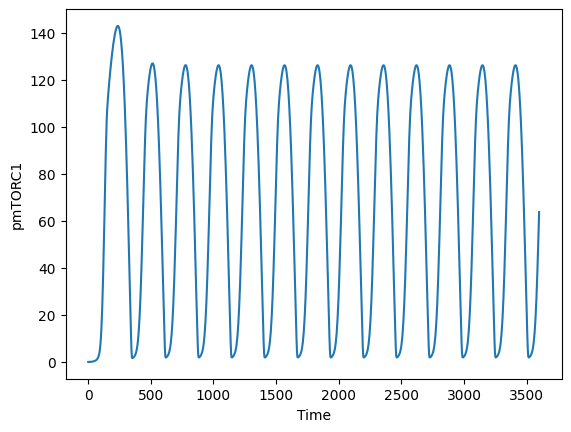

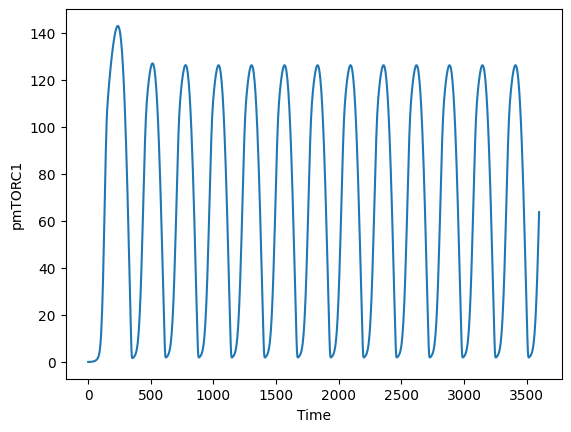

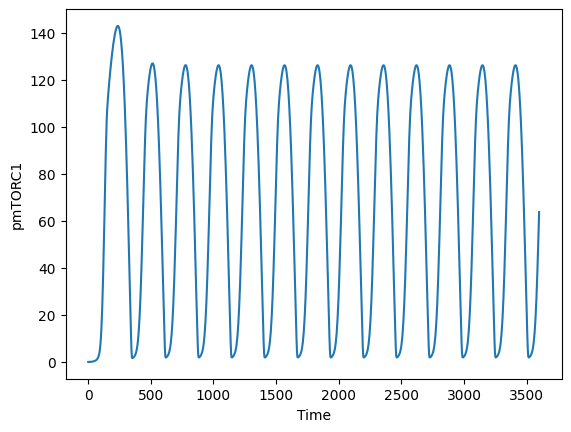

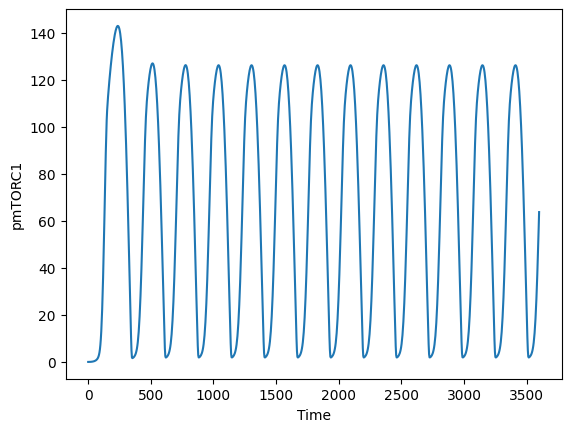

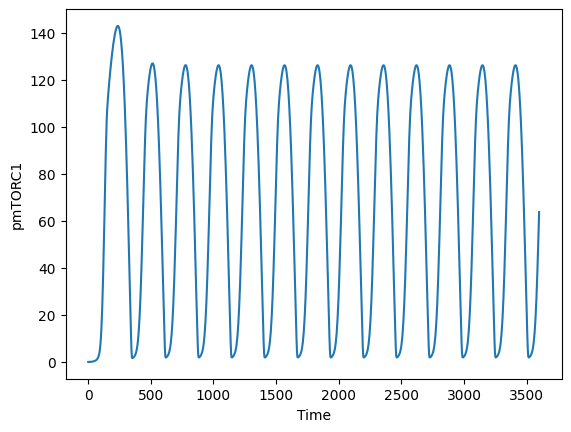

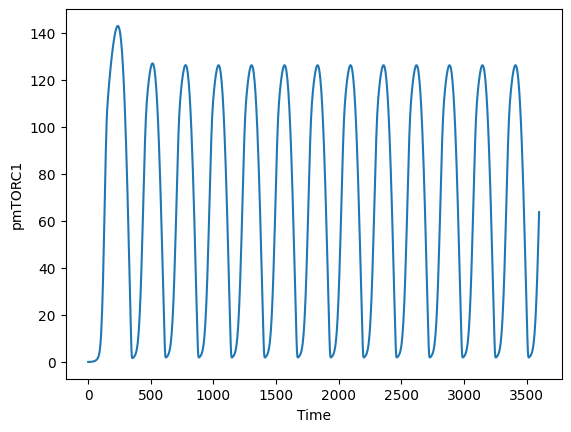

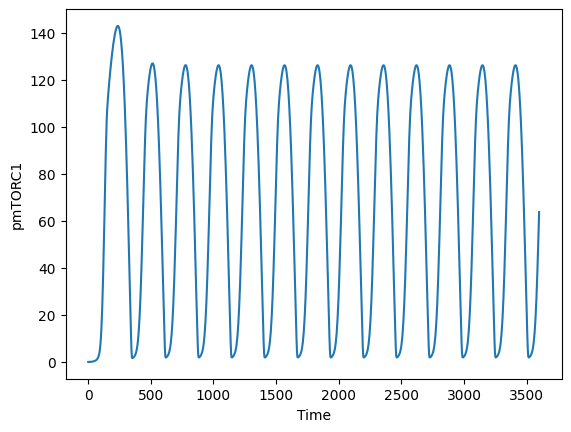

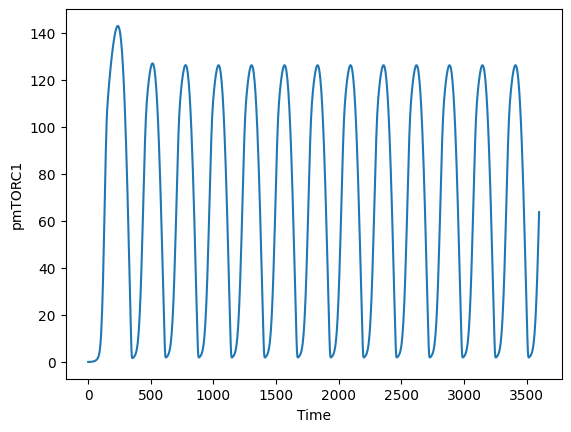

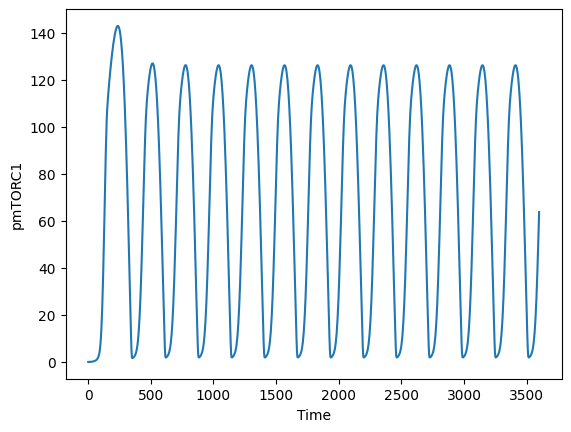

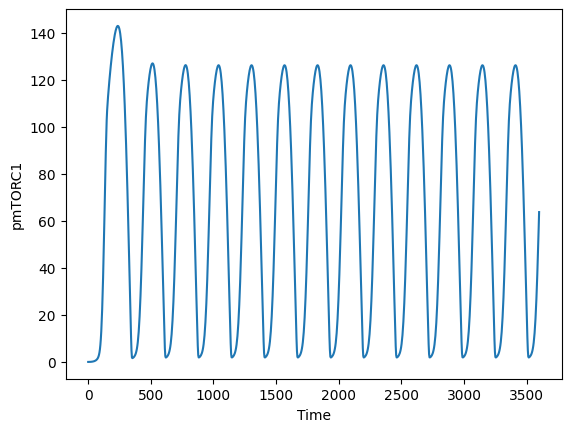

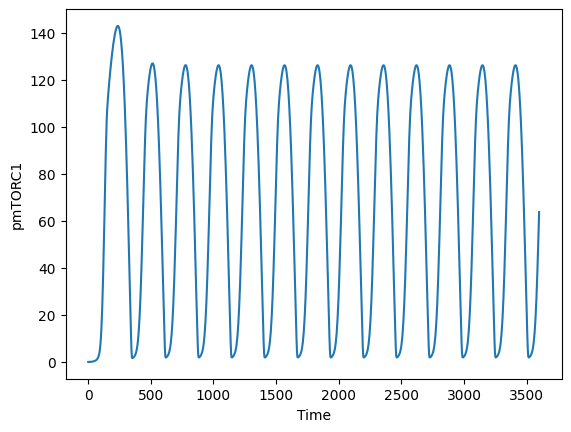

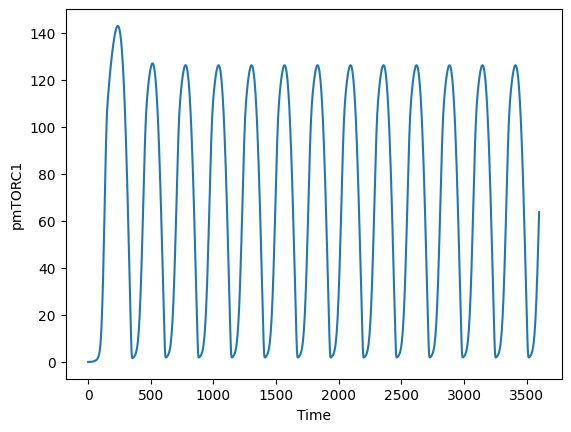

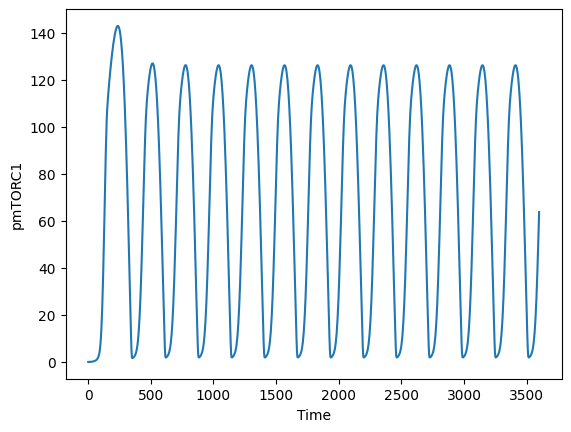

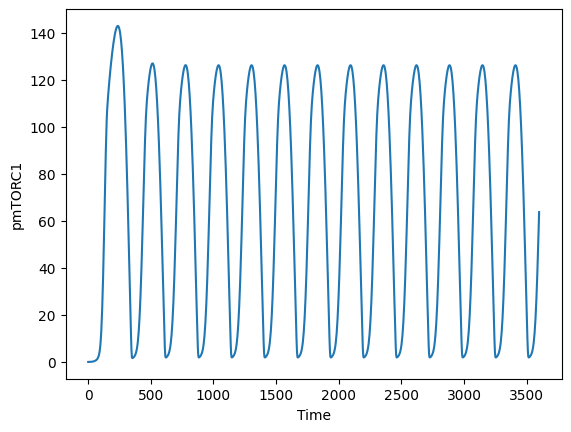

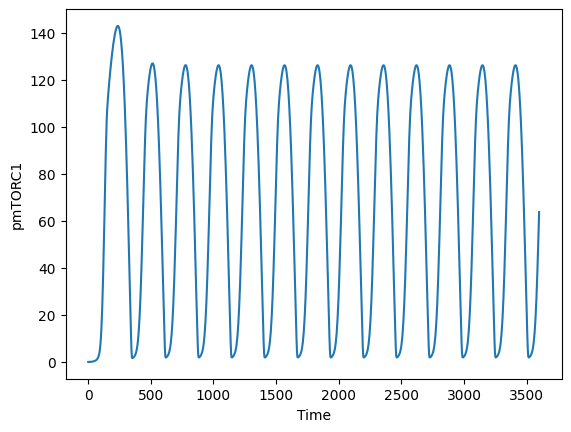

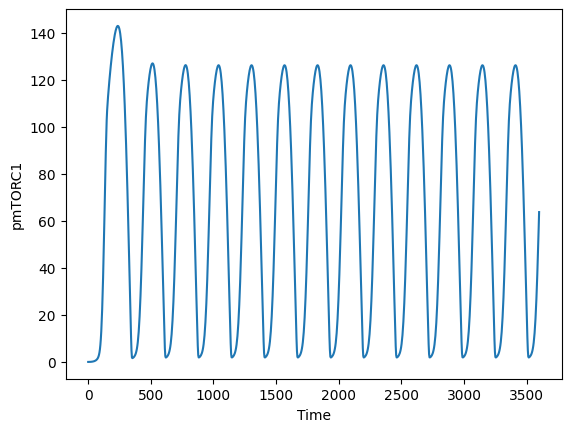

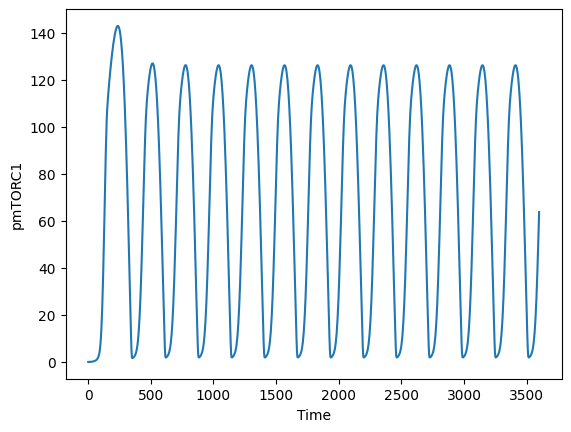

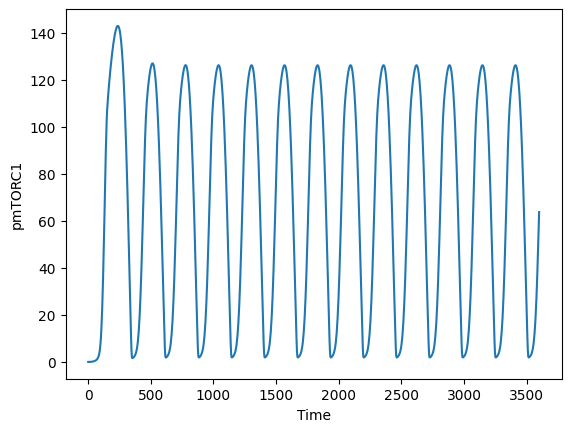

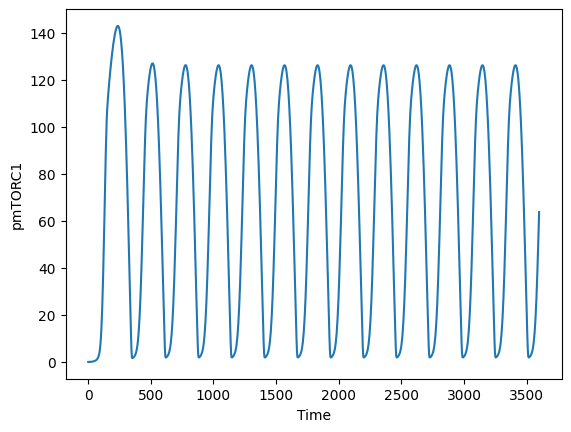

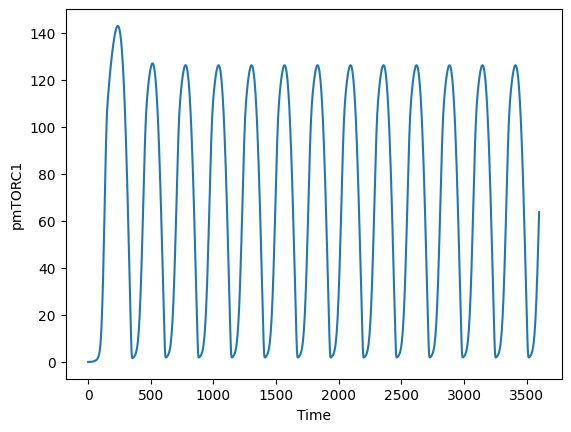

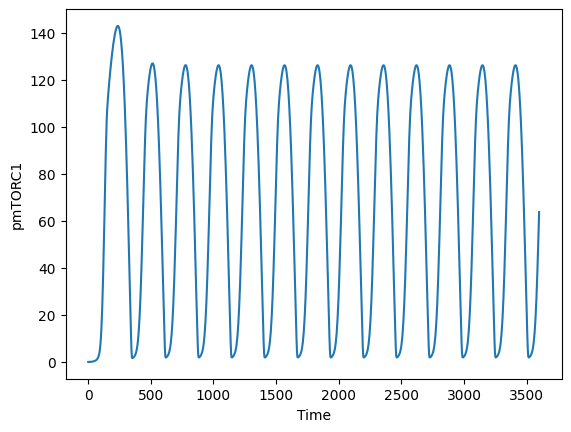

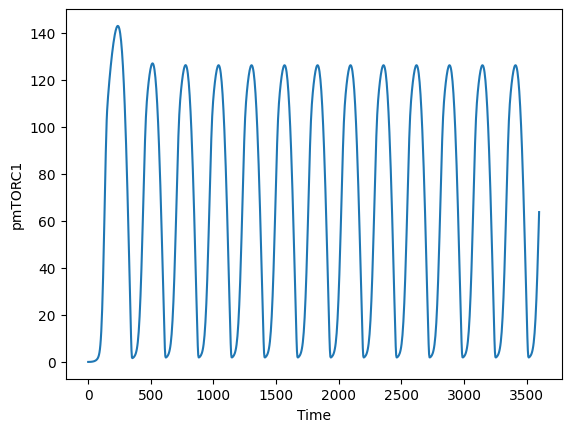

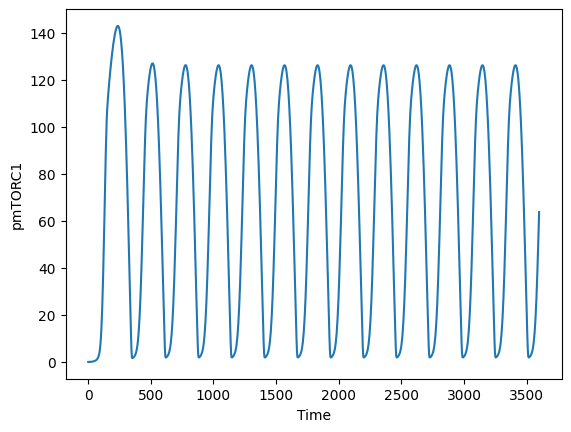

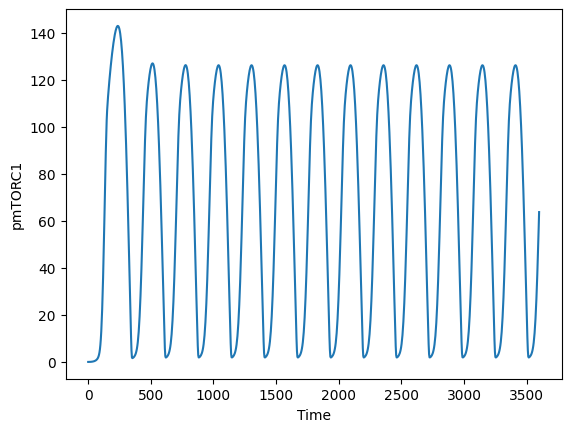

In [11]:
from server.handlers.compare import generate_biosimulators_utc_comparison
from tempfile import mkdtemp

c = await generate_biosimulators_utc_comparison(, mkdtemp(), ['tellurium', 'copasi'], 'comparison')

In [8]:
c

<coroutine object generate_biosimulators_utc_comparison at 0x2a4ee8540>

In [13]:
import tellurium as te

# Define the composite model
antimony_model = '''
model composite_model
  // Gene Expression Model
  model gene_expression
    var DNA, mRNA, Protein
    const k_transcription = 0.1, k_translation = 0.05, k_deg_mRNA = 0.01, k_deg_protein = 0.005
    DNA -> mRNA ; k_transcription * DNA
    mRNA -> Protein ; k_translation * mRNA
    mRNA -> ; k_deg_mRNA * mRNA
    Protein -> ; k_deg_protein * Protein
    DNA = 1
    mRNA = 0
    Protein = 0
  end

  // Metabolic Pathway Model
  model metabolic_pathway
    var Substrate, Product, Enzyme
    const k_cat = 0.1, K_m = 0.05, E_total = 1
    Substrate + Enzyme -> Product + Enzyme ; (k_cat * Substrate * Enzyme) / (K_m + Substrate)
    Substrate = 10
    Product = 0
    Enzyme = E_total
  end

  // Composite Model
  gene_expression = gene_expression
  metabolic_pathway = metabolic_pathway
  metabolic_pathway.Enzyme = gene_expression.Protein
end
'''

# Load the model
r = te.loadAntimonyModel(antimony_model)

# Simulate the model
result = r.simulate(0, 100, 1000)

# Plot the results
r.plot(result)

Exception: Antimony: Error in model string, line 4:  syntax error, unexpected '\n', expecting '.' or text string